In [1]:
from solver import Solver, u_0
import matplotlib.pyplot as plt
import numpy as np

# Transport equation
\begin{align}
u_t + a u_x &= 0\\
u(x,0) &= u_0(x)\\
u(0,t) &= 0
\end{align}

Following are the implementations of various finite difference schemes for the above transport equation given the following initial condition

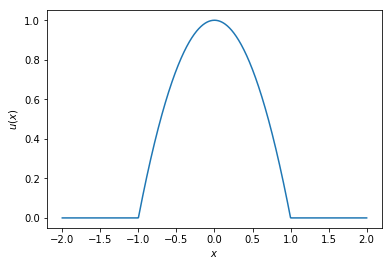

In [2]:
x = np.linspace(-2,2,1000)
u = u_0(x)
plt.plot(x,u)
plt.ylabel('$u(x)$')
plt.xlabel('$x$')
plt.show()

# Finite difference schemes

## FT-BS
These are the results obtained by implementing the forward time backward space scheme.

\begin{align}
U_j^{k+1} = U_j^k - \frac{a \Delta t}{\Delta x}\left( U_j^k - U_{j-1}^k\right)
\end{align}

We will first run it with the following parameters:
\begin{align}
dt &= 1 \times 10^{-3}\\
a  &= -1\\
dx &= 1 \times 10^{-2}\\
\left| \frac{a \Delta t}{\Delta x} \right| &= 0.1
\end{align}

As expected, the solution blows up. This is becausethe flow of information is opposite to the direction of the wave velocity. The solution should depend on the value of $u$ to the right of the grid point.

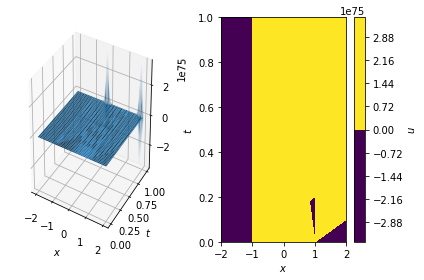

In [3]:
sys = Solver(dt=1e-3, courant=1e-1, a=-1.0, Th=1.0, time ='f', space='b')
sys.solve()
fig = plt.figure()
ax1 = fig.add_subplot(121, projection='3d')
ax2 = fig.add_subplot(122)
sys.plot_contour(ax2)
sys.plot_3d(ax1)
plt.tight_layout()
plt.show()

We now set $a=1.0$ The CFL condition is satisfied and the scheme is stable

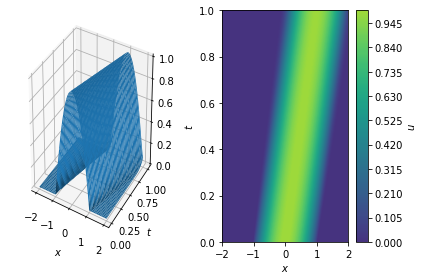

In [4]:
sys = Solver(dt=1e-3, courant=1e-1, a=1.0, Th=1.0, time ='f', space='b')
sys.solve()
fig = plt.figure()
ax1 = fig.add_subplot(121, projection='3d')
ax2 = fig.add_subplot(122)
sys.plot_contour(ax2)
sys.plot_3d(ax1)
plt.tight_layout()
plt.show()

We now set $\Delta x = 1 \times 10^{-3}$ (The courant number becomes $1$)

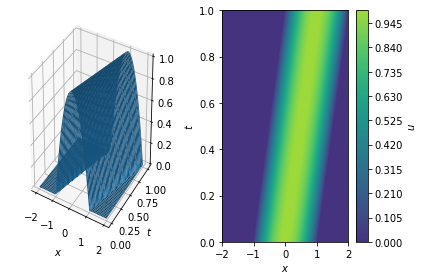

In [5]:
sys = Solver(dt=1e-3, courant=1.0, a=1.0, Th=1.0, time ='f', space='b')
sys.solve()
fig = plt.figure()
ax1 = fig.add_subplot(121, projection='3d')
ax2 = fig.add_subplot(122)
sys.plot_contour(ax2)
sys.plot_3d(ax1)
plt.tight_layout()
plt.show()

We now set $\Delta x = 5 \times 10^{-4}$ (The courant number becomes $2$). The solution blows up as expected since the CFL condition is violated.

/home/foobar/code/ma540/solver.py:52: RuntimeWarning: overflow encountered in true_divide
  self.u_x[:,i] = ( self.u[:,i] - np.roll(self.u[:,i],1) ) / self.dx
/home/foobar/code/ma540/solver.py:69: RuntimeWarning: invalid value encountered in subtract
  self.u[:,i+1] = self.u[:,i] - self.a*(self.dt)*self.u_x[:,i]
/home/foobar/code/ma540/solver.py:52: RuntimeWarning: invalid value encountered in subtract
  self.u_x[:,i] = ( self.u[:,i] - np.roll(self.u[:,i],1) ) / self.dx
/usr/local/lib/python3.5/dist-packages/mpl_toolkits/mplot3d/axes3d.py:1691: RuntimeWarning: invalid value encountered in double_scalars
  avgzsum = sum(p[2] for p in ps2)
/usr/local/lib/python3.5/dist-packages/mpl_toolkits/mplot3d/proj3d.py:73: RuntimeWarning: overflow encountered in double_scalars
  return np.sqrt(v[0]**2+v[1]**2+v[2]**2)
/usr/local/lib/python3.5/dist-packages/mpl_toolkits/mplot3d/axes3d.py:1758: RuntimeWarning: invalid value encountered in true_divide
  for n in normals])
/usr/local/lib/python3.5/dist

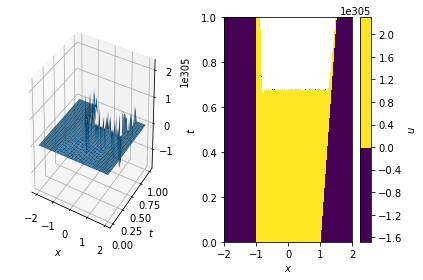

In [6]:
sys = Solver(dt=1e-3, courant=2.0, a=1.0, Th=1.0, time ='f', space='b')
sys.solve()
fig = plt.figure()
ax1 = fig.add_subplot(121, projection='3d')
ax2 = fig.add_subplot(122)
sys.plot_contour(ax2)
sys.plot_3d(ax1)
plt.tight_layout()
plt.show()

Thus, the FTBS scheme is stable only when the wavespeed is positive and the cfl condition is satisfied

## FT-FS
These are the results obtained by implementing the forward time-forward space scheme.

\begin{align}
U_j^{k+1} = U_j^k - \frac{a \Delta t}{\Delta x}\left( U_{j+1}^k - U_{j}^k\right)
\end{align}

We run a similar set of simulations to the ones done for the FT-BS scheme

/home/foobar/code/ma540/solver.py:57: RuntimeWarning: overflow encountered in true_divide
  self.u_x[:,i] = (-1*self.u[:,i]+np.roll(self.u[:,i],-1))/self.dx
/home/foobar/code/ma540/solver.py:69: RuntimeWarning: invalid value encountered in subtract
  self.u[:,i+1] = self.u[:,i] - self.a*(self.dt)*self.u_x[:,i]
/usr/local/lib/python3.5/dist-packages/matplotlib/figure.py:1999: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


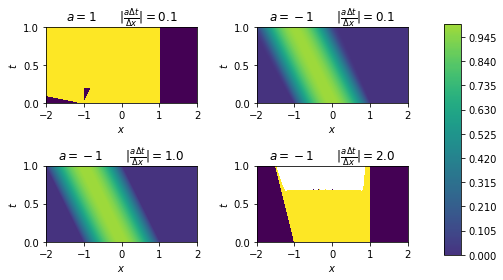

In [11]:
fig, axs = plt.subplots(2,2)
c = []  
for a, courant, ax in zip([1,-1,-1,-1],[0.1,0.1,1.0,2.0], axs.flatten()):
    sys = Solver(dt=1e-3, courant=courant, a=a, Th=1.0, time ='f', space='f')
    sys.solve()
    c.append(sys.plot_contour(ax, False))
    ax.set_title(r'$a='+str(a)+r'\qquad \left| \frac{a \Delta t}{\Delta x} \right| =' +str(courant)+r'$')

#fig.subplots_adjust(right=0.5)
cax = fig.add_axes([1.05, 0.1, 0.04, 0.8])
fig.colorbar(c[1], cax=cax)

plt.tight_layout()
plt.show()

As expected, the solution is stable for $a<0$ and $c<1$

## FT-CS
These are the results obtained by implementing the forward time-central space scheme.

\begin{align}
U_j^{k+1} = U_j^k - \frac{a \Delta t}{2 \Delta x}\left( U_{j+1}^k - U_{j-1}^k\right)
\end{align}

We run the similar set of simulations.

/usr/local/lib/python3.5/dist-packages/matplotlib/figure.py:1999: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


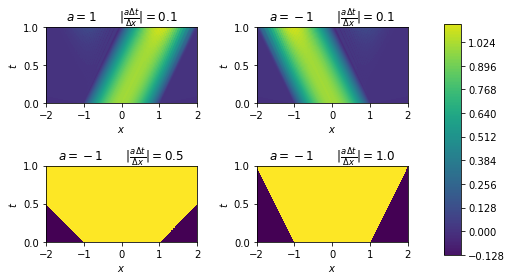

In [9]:
fig, axs = plt.subplots(2,2)
c = []
for a, courant, ax in zip([1,-1,-1,-1],[0.1,0.1,0.5,1.0], axs.flatten()):
    sys = Solver(dt=1e-3, courant=courant, a=a, Th=1.0, time ='f', space='c')
    sys.solve()
    c.append(sys.plot_contour(ax, False))
    ax.set_title(r'$a='+str(a)+r'\qquad \left| \frac{a \Delta t}{\Delta x} \right| =' +str(courant)+r'$')
#fig.subplots_adjust(right=0.5)
cax = fig.add_axes([1.05, 0.1, 0.04, 0.8])
fig.colorbar(c[0], cax=cax)

plt.tight_layout()
plt.show()

This scheme is unconditionall unstable. While it 'works' for both positive and negative values for wavespeed, the scheme blows up as time progresses. Even when the courant number is $0.1$ we can see that the height of the peak is rising with time. It will eventually blow up

## Leapfrog scheme
These are the results obtained by implementing the central time-central space scheme.

\begin{align}
U_j^{k+1} = U_j^{k-1} - \frac{a \Delta t}{\Delta x}\left( U_{j+1}^k - U_{j-1}^k\right)
\end{align}

We run a similar set of simulations.

/home/foobar/code/ma540/solver.py:62: RuntimeWarning: overflow encountered in true_divide
  self.u_x[:,i] = (np.roll(self.u[:,i],-1) - np.roll(self.u[:,i],1))/(2*self.dx)
/home/foobar/code/ma540/solver.py:73: RuntimeWarning: invalid value encountered in subtract
  self.u[:,i+1] = self.u[:,i-1] - 2*self.a*(self.dt)*self.u_x[:,i]
/home/foobar/code/ma540/solver.py:62: RuntimeWarning: invalid value encountered in subtract
  self.u_x[:,i] = (np.roll(self.u[:,i],-1) - np.roll(self.u[:,i],1))/(2*self.dx)
/usr/local/lib/python3.5/dist-packages/matplotlib/figure.py:1999: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


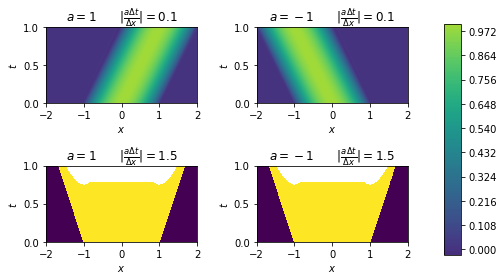

In [31]:
fig, axs = plt.subplots(2,2)
c = []
for a, courant, ax in zip([1,-1,1,-1],[0.1,0.1,1.5,1.5], axs.flatten()):
    sys = Solver(dt=1e-3, courant=courant, a=a, Th=1.0, time ='c', space='c')
    sys.solve()
    c.append(sys.plot_contour(ax, False))
    ax.set_title(r'$a='+str(a)+r'\qquad \left| \frac{a \Delta t}{\Delta x} \right| =' +str(courant)+r'$')
#fig.subplots_adjust(right=0.5)
cax = fig.add_axes([1.05, 0.1, 0.04, 0.8])
fig.colorbar(c[0], cax=cax)

plt.tight_layout()
plt.show()

Leapfrog scheme is thus stable(in both directions) when the CFL condition is satisfied. The scheme is unstable when the CFL condition is violated

## Lax Friedrich scheme
These are the results obtained by implementing the Lax-Friedrich scheme.

\begin{align}
U_j^{k+1} = \frac{U_{j-1}^{k} + U_{j-1}^{k}}{2} - \frac{a \Delta t}{2\Delta x}\left( U_{j+1}^k - U_{j-1}^k\right)
\end{align}

We run a similar set of simulations.

/usr/local/lib/python3.5/dist-packages/matplotlib/figure.py:1999: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


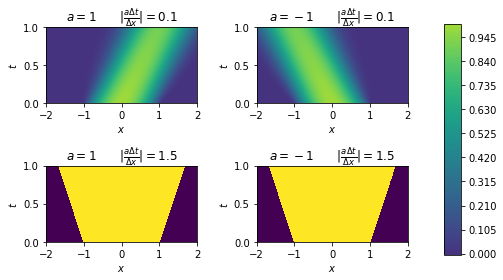

In [7]:
fig, axs = plt.subplots(2,2)
c = []
for a, courant, ax in zip([1,-1,1,-1],[0.1,0.1,1.5,1.5], axs.flatten()):
    sys = Solver(dt=1e-3, courant=courant, a=a, Th=1.0, time ='lf', space='c')
    sys.solve()
    c.append(sys.plot_contour(ax, False))
    ax.set_title(r'$a='+str(a)+r'\qquad \left| \frac{a \Delta t}{\Delta x} \right| =' +str(courant)+r'$')
#fig.subplots_adjust(right=0.5)
cax = fig.add_axes([1.05, 0.1, 0.04, 0.8])
fig.colorbar(c[0], cax=cax)

plt.tight_layout()
plt.show()

Lax-Friedrich scheme is thus stable(in both directions) when the CFL condition is satisfied. The scheme is unstable when the CFL condition is violated.

## Lax Wendroff scheme
These are the results obtained by implementing the Lax-Wendroff scheme.

\begin{align}
U_j^{k+1} = \left[ 1-\left(\frac{a\Delta t}{\Delta x}\right)^2\right]U_j^k + 
\left[ \frac{a\Delta t}{\Delta x}+\frac{1}{2}\left(\frac{a\Delta t}{\Delta x}\right)^2\right]U_{j-1}^k + 
\left[ -\frac{a\Delta t}{\Delta x}+\frac{1}{2}\left(\frac{a\Delta t}{\Delta x}\right)^2\right]U_{j+1}^k
\end{align}

We run a similar set of simulations.

/usr/local/lib/python3.5/dist-packages/matplotlib/figure.py:1999: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


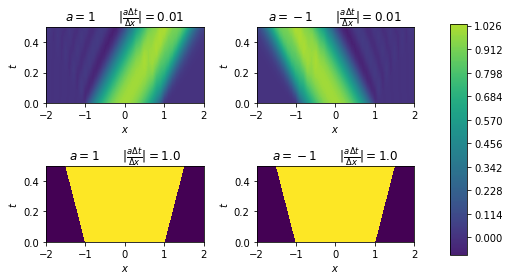

In [13]:
fig, axs = plt.subplots(2,2)
c = []
for a, courant, ax in zip([1,-1,1,-1],[0.01,0.01,1.0,1.0], axs.flatten()):
    sys = Solver(dt=1e-3, courant=courant, a=a, Th=0.5, time ='lw', space='c')
    sys.solve()
    c.append(sys.plot_contour(ax, False))
    ax.set_title(r'$a='+str(a)+r'\qquad \left| \frac{a \Delta t}{\Delta x} \right| =' +str(courant)+r'$')
#fig.subplots_adjust(right=0.5)
cax = fig.add_axes([1.05, 0.1, 0.04, 0.8])
fig.colorbar(c[0], cax=cax)

plt.tight_layout()
plt.show()

This scheme also works for wave velocities in both directions given the CFL number is satisfied